# NHS_DigData_Step_Up_Challenge

# Data we are using for analysis

This data is from the NSHBSA Open Data Portal, and is called the 'Prescription Cost analysis' dataset.

https://opendata.nhsbsa.net/dataset/prescription-cost-analysis-pca-monthly-data

This data is open source, which means:

We can share it openly
It has no security concerns
This is a monthly dataset that describes how many medicines were prescribed across all GP Practices in england, per NHS Region, and what they cost. This is 'real data', so actually describes real anti-depressant prescribing in England. We have merged, simplified and filtered all these monthly files into a single dataset.

The data is being read into this notebook using this github repo link below (do not delete).

In [9]:
! git clone https://github.com/nhsengland/Digdata

fatal: destination path 'Digdata' already exists and is not an empty directory.


In [10]:
#Printing 'BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv' to data frame
import pandas as pd

pca_regional_drug_summary_df = pd.read_csv('Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

display(pca_regional_drug_summary_df)

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72
...,...,...,...,...,...,...
9450,2024,202410,MIDLANDS,Vortioxetine,5989,149309.82
9451,2024,202410,NORTH EAST AND YORKSHIRE,Vortioxetine,6687,139779.09
9452,2024,202410,NORTH WEST,Vortioxetine,5430,124510.32
9453,2024,202410,SOUTH EAST,Vortioxetine,7018,178709.85


In [11]:
import pandas as pd

# Load dataset
df = pd.read_csv('Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

# Display summary statistics
print(df.describe())

              YEAR     YEAR_MONTH          ITEMS          COST
count  9455.000000    9455.000000    9455.000000  9.455000e+03
mean   2022.431623  202249.442623   35227.665891  9.856693e+04
std       1.096446     109.390932   70594.998779  1.721329e+05
min    2021.000000  202101.000000       1.000000  1.100000e+00
25%    2021.000000  202112.000000     165.000000  6.541955e+03
50%    2022.000000  202211.000000    1741.000000  3.602232e+04
75%    2023.000000  202311.000000   24660.000000  1.103895e+05
max    2024.000000  202410.000000  491676.000000  2.721513e+06


In [12]:
df[['ITEMS','COST']].describe()

,ITEMS,COST
count,9455.000000,9.455000e+03
mean,35227.665891,9.856693e+04
std,70594.998779,1.721329e+05
min,1.000000,1.100000e+00
25%,165.000000,6.541955e+03
50%,1741.000000,3.602232e+04
75%,24660.000000,1.103895e+05
max,491676.000000,2.721513e+06


In [13]:
df.describe(include='all')

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
count,9455.000000,9455.000000,9455,9455,9455.000000,9.455000e+03
unique,NaN,NaN,7,32,NaN,NaN
top,NaN,NaN,MIDLANDS,Agomelatine,NaN,NaN
freq,NaN,NaN,1380,322,NaN,NaN
mean,2022.431623,202249.442623,NaN,NaN,35227.665891,9.856693e+04
std,1.096446,109.390932,NaN,NaN,70594.998779,1.721329e+05
min,2021.000000,202101.000000,NaN,NaN,1.000000,1.100000e+00
25%,2021.000000,202112.000000,NaN,NaN,165.000000,6.541955e+03
50%,2022.000000,202211.000000,NaN,NaN,1741.000000,3.602232e+04
75%,2023.000000,202311.000000,NaN,NaN,24660.000000,1.103895e+05


# Data Set Summary

pca_regional_drug_summary_df
This dataset now contains 6 columns:

YEAR: The year in the format YYYY. There are 4 years-worth of prescribing information in the dataset.
YEAR_MONTH: The year and month, in the format YYYYMM, where 202401 is the same as January 2024. There are 46 year-month values in the data.
REGION: The NHS Region. There are 7 regions in the data.
DRUG: The name of the anti-depressant medicine. There are 32 of these in the data.
ITEMS: How many items were prescribed.
COST: The combined cost for all those items.
In a sentence we could describe this dataset as:

Per English NHS Region and per year-month, the volume and cost of each antidepressant drug prescribed.
And what we are going to do with this data is:

Understand national and regional prescribing volumes and costs
Understand national and regional prescribing trends
Understand monthly and annual trends
And finally, maybe even predict future monthly anti-depressant prescribing volumes

In [14]:
#Printing 'BSA_ODP_PCA_REGIONAL_SUMMARY.csv' to data frame
import pandas as pd

pca_regional_summary_df = pd.read_csv('Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

display(pca_regional_summary_df)

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72
...,...,...,...,...,...,...
9450,2024,202410,MIDLANDS,Vortioxetine,5989,149309.82
9451,2024,202410,NORTH EAST AND YORKSHIRE,Vortioxetine,6687,139779.09
9452,2024,202410,NORTH WEST,Vortioxetine,5430,124510.32
9453,2024,202410,SOUTH EAST,Vortioxetine,7018,178709.85


In [15]:
#Data Cleaning/filtering Year/cost for national prescribing of anti-depressant

import pandas as pd

# Loading the dataset and forcing YEAR_MONTH to be string
file_path = 'Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv'
df = pd.read_csv(file_path, dtype={'YEAR_MONTH': 'string'})

# YEAR_MONTH is already string now, so no need for this:
# df.loc[:, 'YEAR_MONTH'] = df['YEAR_MONTH'].astype(str)

# Removing invalid YEAR_MONTH entries (those with invalid months like 00 or > 12)
df_cleaned = df[df['YEAR_MONTH'].str[-2:].apply(lambda x: x.isdigit() and int(x) in range(1, 13))]

# Grouping by YEAR_MONTH and summing the COST
monthly_cost = df_cleaned.groupby('YEAR_MONTH')['COST'].sum().reset_index()

# Rounding the cost to the nearest pound
monthly_cost['COST'] = monthly_cost['COST'].round()

# Saving the cleaned and processed data
monthly_cost.to_csv("national_prescribing_monthly_cost.csv", index=False)

# Reading the cleaned data back
national_prescribing_monthly_cost_df = pd.read_csv("national_prescribing_monthly_cost.csv")

display(national_prescribing_monthly_cost_df)


,YEAR_MONTH,COST
0,202101,30211077.0
1,202102,28478445.0
2,202103,31933610.0
3,202104,24695555.0
4,202105,23672108.0
5,202106,25222625.0
6,202107,21726964.0
7,202108,20640541.0
8,202109,21776371.0
9,202110,18949756.0


In [16]:
#Data cleaning/Filtering for escitalopram_monthly_cost Part 1


import pandas as pd

#Loading the dataset
df = pd.read_csv(
    'Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv',
    dtype={'YEAR_MONTH': 'string'}
)

# Filtering the dataset for Escitalopram
escitalopram_df = df[df['BNF_CHEMICAL_SUBSTANCE']
                     .str.contains('escitalopram', case=False, na=False)].copy()

#Ensuring YEAR_MONTH is a string to handle inconsistencies
escitalopram_df.loc[:, 'YEAR_MONTH'] = escitalopram_df['YEAR_MONTH'].astype(str)

#Removing invalid YEAR_MONTH entries, such as those 
#with invalid months (00 or greater than 12)
escitalopram_df = escitalopram_df[escitalopram_df['YEAR_MONTH']
                                  .str[-2:].apply(lambda x: x.isdigit() 
                                                  and int(x) in range(1, 13))]

#Grouping by YEAR_MONTH and summing the COST
monthly_cost = escitalopram_df.groupby('YEAR_MONTH')['COST'].sum().reset_index()

#Rounding the cost to the nearest pound
monthly_cost['COST'] = monthly_cost['COST'].round()

#Saving the cleaned and processed data for use in the next step
monthly_cost.to_csv("escitalopram_monthly_cost.csv", index=False) 


#reading the cleaned data for escitalopram_monthly_cost to data frame 

import pandas as pd

escitalopram_monthly_cost_df = pd.read_csv("escitalopram_monthly_cost.csv")

display(escitalopram_monthly_cost_df)


,YEAR_MONTH,COST
0,202101,281379.0
1,202102,265537.0
2,202103,298423.0
3,202104,275776.0
4,202105,266979.0
5,202106,282306.0
6,202107,249306.0
7,202108,237874.0
8,202109,250890.0
9,202110,222237.0


#Part 1: Transforming and Aggregating Data Exercises

#Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

In [17]:
import pandas as pd

#Loading the dataset
df = pd.read_csv('Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

#Grouping by column BNF_CHEMICAL_SUBSTANCE (anti-depressants) 
#and sum the number of items prescribed
drug_prescriptions = (
    df
    .groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)


#Renaming the 'ITEMS' column to 'total_no_prescribed'
drug_prescriptions.rename(columns={'ITEMS': 'total_no_prescribed'}, inplace=True)


#Displaying the top 10 most prescribed anti-depressants 
print("Top 10 Most Prescribed Drugs Nationally:")
print(drug_prescriptions.head(10))


Top 10 Most Prescribed Drugs Nationally:
        BNF_CHEMICAL_SUBSTANCE  total_no_prescribed
0     Sertraline hydrochloride             85402251
1  Amitriptyline hydrochloride             59272937
2      Citalopram hydrobromide             52891620
3                  Mirtazapine             46335570
4     Fluoxetine hydrochloride             28211759
5                  Venlafaxine             21447209
6     Duloxetine hydrochloride             14262656
7                 Escitalopram              6580386
8     Paroxetine hydrochloride              4886615
9      Trazodone hydrochloride              4861813


#Question 2: Calculate the monthly national cost of Mirtazapine prescribing

In [18]:
import pandas as pd

#Loading the dataset
df = pd.read_csv('Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

#Filtering the dataset for Mirtazapine
mirtazapine_df = df[df['BNF_CHEMICAL_SUBSTANCE']
                    .str.contains('mirtazapine', case=False, na=False)]

#Grouping by YEAR_MONTH and summing the COST
monthly_cost = mirtazapine_df.groupby('YEAR_MONTH')['COST'].sum().reset_index()

#Renaming the total's column to reflect the total annual spend
monthly_cost.rename(columns={'COST': 'Total_monthly_national_cost'}, inplace=True)

#Displaying the monthly national cost of Mirtazapine prescribing
print("Monthly National Cost of Mirtazapine Prescribing:")
print(monthly_cost)


Monthly National Cost of Mirtazapine Prescribing:
    YEAR_MONTH  Total_monthly_national_cost
0       202101                   2380030.90
1       202102                   2249220.63
2       202103                   2523008.14
3       202104                   2039348.02
4       202105                   1935629.32
5       202106                   2055820.88
6       202107                   1609248.23
7       202108                   1539582.17
8       202109                   1621383.70
9       202110                   1356643.04
10      202111                   1429072.08
11      202112                   1496540.76
12      202201                   1174913.49
13      202202                   1094983.89
14      202203                   1248772.91
15      202204                   1141081.07
16      202205                   1190452.94
17      202206                   1155918.28
18      202207                   1060524.71
19      202208                   1097570.56
20      202209            

#Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

In [19]:
import pandas as pd

#Loading the dataset
df = pd.read_csv('Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

#Filtering for Sertraline hydrochloride and the Midlands region
sertraline_midlands_df = df[
    (df['BNF_CHEMICAL_SUBSTANCE'].str.contains('sertraline hydrochloride', 
                                               case=False, na=False)) &
    (df['REGION_NAME'].str.contains('Midlands', case=False, na=False))
]

#Grouping by YEAR and summing the COST
annual_cost_midlands = sertraline_midlands_df.groupby('YEAR')['COST'].sum().reset_index()

#Renaming the total's column to reflect the total annual spend
annual_cost_midlands.rename(columns={'COST': 'Total_Annual_Spend'}, inplace=True)

#Displaying the annual spend for Sertraline hydrochloride in the Midlands region
print("Annual Spend of Sertraline Hydrochloride Prescribing in the Midlands Region:")
print(annual_cost_midlands)


Annual Spend of Sertraline Hydrochloride Prescribing in the Midlands Region:
   YEAR  Total_Annual_Spend
0  2021         17477276.46
1  2022          6433863.59
2  2023          7600322.04
3  2024          8094889.16


#Part 2: Data Visualisation Exercises

#Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

In [20]:
#Filtering data for 2024 and calculating the top 5 prescribed drugs
import pandas as pd

#Loading the dataset
df = pd.read_csv('Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

# Filter data for 2024
df_2024 = df[df['YEAR'] == 2024]

#Grouping by BNF_CHEMICAL_SUBSTANCE and summing the number of items prescribed in 2024
top_drugs_2024 = (
    df_2024.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)


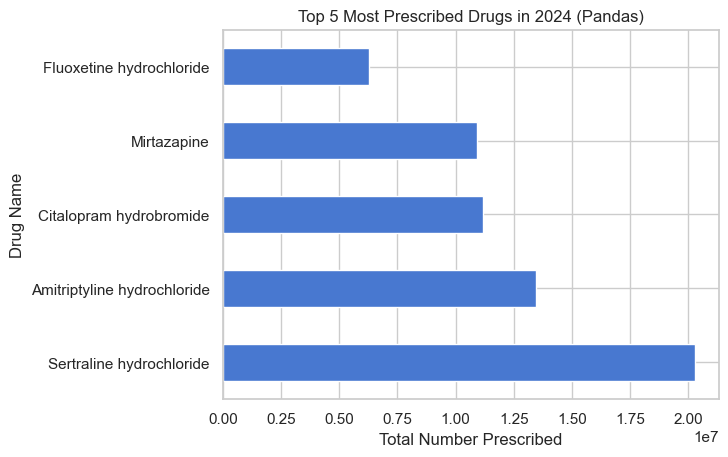

In [21]:
#Horizontal bar chart using Pandas
import matplotlib.pyplot as plt

#Pandas horizontal bar chart
top_drugs_2024.plot(kind='barh', x='BNF_CHEMICAL_SUBSTANCE', y='ITEMS', legend=False)
plt.title('Top 5 Most Prescribed Drugs in 2024 (Pandas)')
plt.xlabel('Total Number Prescribed')
plt.ylabel('Drug Name')
plt.show()


#Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.

In [22]:
#Filtering the data for Sertraline hydrochloride and NORTH WEST region
import pandas as pd
import matplotlib.pyplot as plt

#Loading the dataset
df = pd.read_csv('Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

#Filtering the dataset for Sertraline hydrochloride and the NORTH WEST region
sertraline_nw_df = df[(df['BNF_CHEMICAL_SUBSTANCE'].str.contains('Sertraline hydrochloride', 
                                                                 case=False, na=False)) &
                      (df['REGION_NAME'] == 'NORTH WEST')]

#Grouping by YEAR and summing the COST for Sertraline in the NORTH WEST region
annual_cost_sertraline_nw = sertraline_nw_df.groupby('YEAR')['COST'].sum().reset_index()


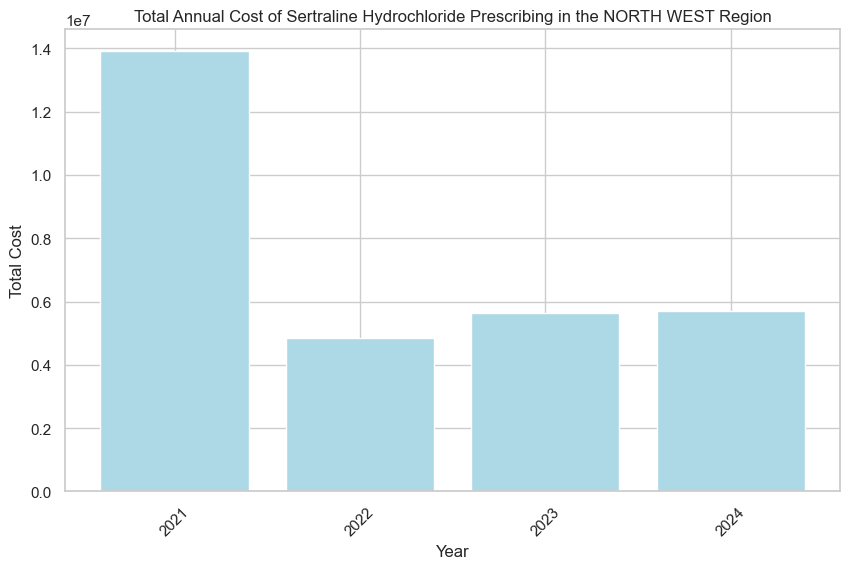

In [23]:
#Vertical bar chart using Matplotlib

#Plotting a vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(annual_cost_sertraline_nw['YEAR'], 
        annual_cost_sertraline_nw['COST'], color='lightblue')

#Adding labels and title
plt.title('Total Annual Cost of Sertraline Hydrochloride Prescribing in the NORTH WEST Region')
plt.xlabel('Year')
plt.ylabel('Total Cost')
plt.xticks(annual_cost_sertraline_nw['YEAR'], rotation=45)

#Displaying the plot
plt.show()


#Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.

In [24]:
#Data cleaning/Filtering for escitalopram_monthly_cost part 1

import pandas as pd

#Loading the dataset
df = pd.read_csv(
    'Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv',
    dtype={'YEAR_MONTH': 'string'}
)

# Filtering the dataset for Escitalopram
escitalopram_df = df[df['BNF_CHEMICAL_SUBSTANCE']
                     .str.contains('escitalopram', case=False, na=False)].copy()

#Ensuring YEAR_MONTH is a string to handle inconsistencies
escitalopram_df.loc[:, 'YEAR_MONTH'] = escitalopram_df['YEAR_MONTH'].astype(str)

#Removing invalid YEAR_MONTH entries, such as 
#those with invalid months (00 or greater than 12)
escitalopram_df = escitalopram_df[escitalopram_df['YEAR_MONTH']
                                  .str[-2:].apply(lambda x: x.isdigit() 
                                            and int(x) in range(1, 13))]

#Grouping by YEAR_MONTH and summing the COST
monthly_cost = escitalopram_df.groupby('YEAR_MONTH')['COST'].sum().reset_index()

#Rounding the cost to the nearest pound
monthly_cost['COST'] = monthly_cost['COST'].round()

#Saving the cleaned and processed data for use in the next step
monthly_cost.to_csv("escitalopram_monthly_cost.csv", index=False) 


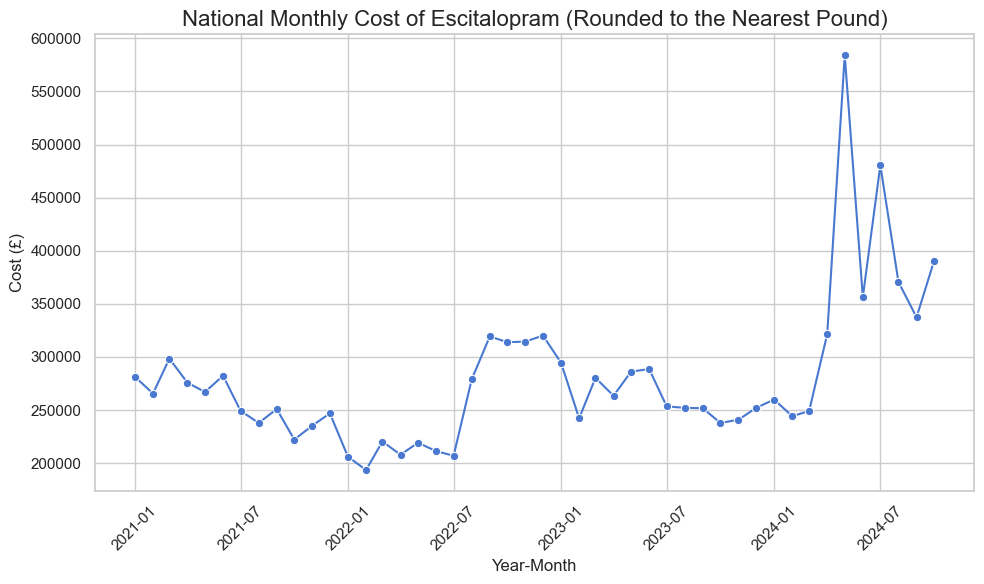

In [54]:
# Seaborn Vertical Graph (Using the Cleaned Data)
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exact base directory for your project
base_dir = r"C:\Projects\NHS_DigData_Analysis"
images_dir = os.path.join(base_dir, "images")

# Make sure images folder exists at the exact path
os.makedirs(images_dir, exist_ok=True)

# Loading the cleaned data from Part 1
monthly_cost = pd.read_csv("escitalopram_monthly_cost.csv")

# Making sure the 'YEAR_MONTH' is sorted chronologically
monthly_cost['YEAR_MONTH'] = pd.to_datetime(
    monthly_cost['YEAR_MONTH'],
    format='%Y%m'
)

# Setting seaborn style
sns.set(style="whitegrid", palette="muted")

# Creating the line plot
plt.figure(figsize=(10, 6))  # Adjusting figure size for clarity
sns.lineplot(
    data=monthly_cost,
    x='YEAR_MONTH',
    y='COST',
    marker='o'
)

# Adding title and labels
plt.title(
    "National Monthly Cost of Escitalopram (Rounded to the Nearest Pound)",
    fontsize=16
)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Cost (£)", fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to avoid clipping

# Save image to the exact directory
plt.savefig(os.path.join(images_dir, "escitalopram_monthly_cost.png"), dpi=300)

# Show the plot in the notebook
plt.show()


#Part 3: Data Metrics and Insights
#Part 3: Data Metrics and Insight Exercises
#For these exercises, you will need to use the dataframe pca_regional_drug_summary_df

#Question 1: For context, create a monthly line chart showing total national prescribing cost

In [26]:
import pandas as pd

# Loading the dataset and force YEAR_MONTH to be a string
file_path = 'Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv'
df = pd.read_csv(file_path, dtype={'YEAR_MONTH': 'string'})

# Removing invalid YEAR_MONTH entries (months must be 01–12)
df_cleaned = df[
    df['YEAR_MONTH'].str[-2:].apply(
        lambda x: x.isdigit() and int(x) in range(1, 13)
    )
]

# Grouping by YEAR_MONTH and sum COST to get total national prescribing cost
monthly_cost = (
    df_cleaned
    .groupby('YEAR_MONTH', as_index=False)['COST']
    .sum()
)

# Rounding the cost to the nearest pound
monthly_cost['COST'] = monthly_cost['COST'].round()

# Saving the cleaned and processed data for later use
output_path = "national_prescribing_monthly_cost.csv"
monthly_cost.to_csv(output_path, index=False)

# Reading the cleaned data back in and display
national_prescribing_monthly_cost_df = pd.read_csv(output_path)

display(national_prescribing_monthly_cost_df)




,YEAR_MONTH,COST
0,202101,30211077.0
1,202102,28478445.0
2,202103,31933610.0
3,202104,24695555.0
4,202105,23672108.0
5,202106,25222625.0
6,202107,21726964.0
7,202108,20640541.0
8,202109,21776371.0
9,202110,18949756.0


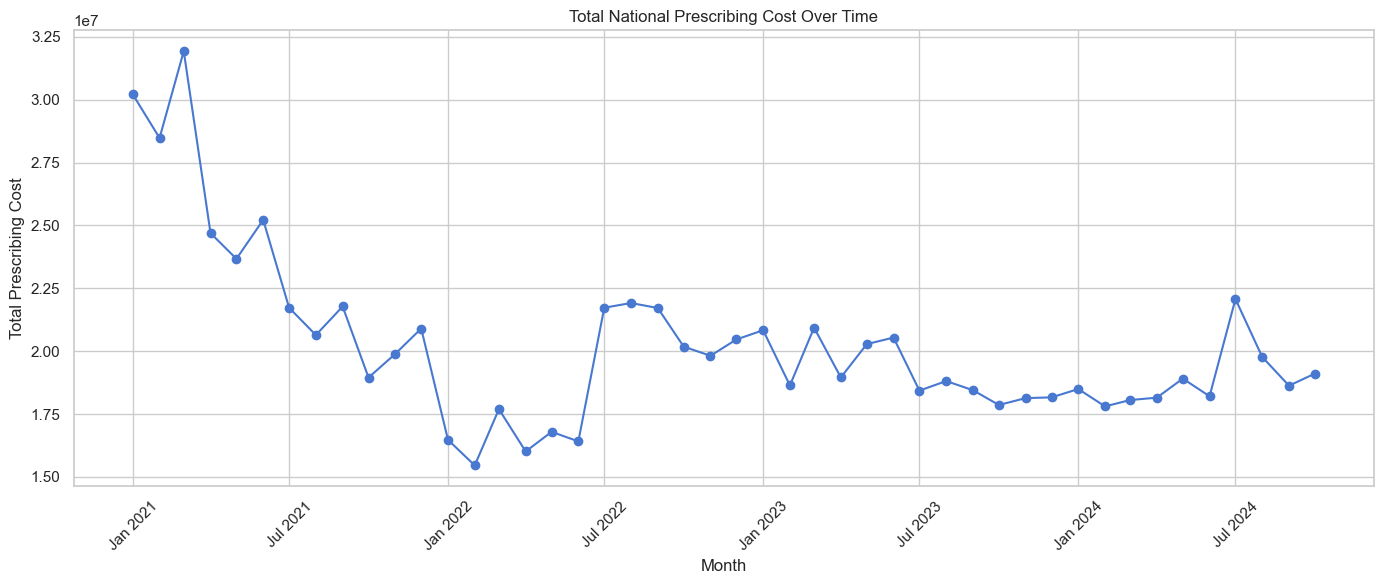

In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Exact base directory for your project
base_dir = r"C:\Projects\NHS_DigData_Analysis"
images_dir = os.path.join(base_dir, "images")

# Make sure images folder exists at that exact path
os.makedirs(images_dir, exist_ok=True)

# Reading the cleaned data
monthly_cost = pd.read_csv("national_prescribing_monthly_cost.csv")

# Converting YEAR_MONTH to datetime format
monthly_cost['YEAR_MONTH'] = pd.to_datetime(
    monthly_cost['YEAR_MONTH'],
    format='%Y%m'
)

# Plotting the total national prescribing cost over time
plt.figure(figsize=(14, 6))  # Increase the figure width to create more spacing

# Plotting the data with markers for each month
plt.plot(
    monthly_cost['YEAR_MONTH'],
    monthly_cost['COST'],
    marker='o',
    linestyle='-'
)

# Customizing the plot
plt.title('Total National Prescribing Cost Over Time')
plt.xlabel('Month')
plt.ylabel('Total Prescribing Cost')

# every 6th month is displayed as a tick on the x-axis
tick_positions = monthly_cost['YEAR_MONTH'][::6]
tick_labels = monthly_cost['YEAR_MONTH'].dt.strftime('%b %Y')[::6]

# Applying the ticks and labels
plt.xticks(tick_positions, tick_labels, rotation=45)

plt.grid(True)
plt.tight_layout()

# Save image to the exact directory
plt.savefig(
    os.path.join(images_dir, "total_national_prescribing_cost_over_time.png"),
    dpi=300
)

# Show in notebook
plt.show()


#Question 2: Create annual summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)

In [28]:
import pandas as pd

#Reading the cleaned data
monthly_cost = pd.read_csv("national_prescribing_monthly_cost.csv")

#Converting YEAR_MONTH to datetime format
monthly_cost['YEAR_MONTH'] = pd.to_datetime(monthly_cost['YEAR_MONTH'], format='%Y%m')

#Extracting the year from the 'YEAR_MONTH' column
monthly_cost['Year'] = monthly_cost['YEAR_MONTH'].dt.year

#Grouping by year and calculating the required statistics
annual_summary = monthly_cost.groupby('Year')['COST'].describe(percentiles=[.25, .50, .75])

#Renaming the columns to make the output clearer
annual_summary = annual_summary[['min', '25%', '50%', '75%', 'max']]

#Displaying the annual summary
print(annual_summary)


             min          25%         50%          75%         max
Year                                                              
2021  18949756.0  20835484.75  22724239.5  26036580.00  31933610.0
2022  15453991.0  16458373.25  18754197.0  20776870.25  21914897.0
2023  17859075.0  18362788.75  18722910.5  20344159.50  20934042.0
2024  17802905.0  18163828.25  18560027.0  19056284.00  22071625.0


#Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)

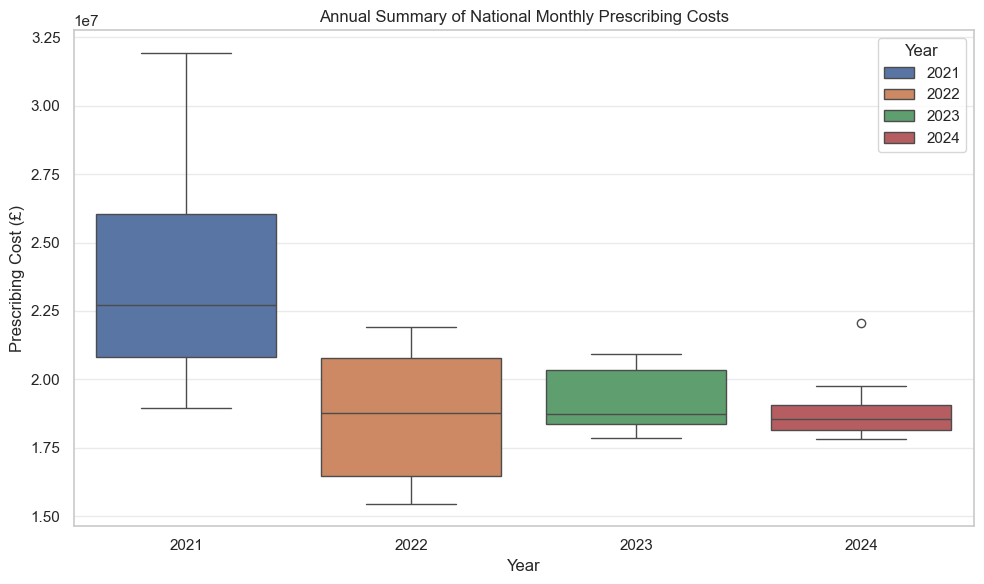

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Exact base directory for your project
base_dir = r"C:\Projects\NHS_DigData_Analysis"
images_dir = os.path.join(base_dir, "images")

# Make sure images folder exists at that exact path
os.makedirs(images_dir, exist_ok=True)

# Reading the cleaned data
monthly_cost = pd.read_csv("national_prescribing_monthly_cost.csv")

# Converting YEAR_MONTH to datetime format
monthly_cost['YEAR_MONTH'] = pd.to_datetime(
    monthly_cost['YEAR_MONTH'],
    format='%Y%m'
)

# Extracting the year from the 'YEAR_MONTH' column
monthly_cost['Year'] = monthly_cost['YEAR_MONTH'].dt.year

# Setting up the matplotlib figure
plt.figure(figsize=(10, 6))

# Creating a seaborn boxplot grouped by year
sns.boxplot(
    x='Year',
    y='COST',
    hue='Year',           # keeps colours per year
    data=monthly_cost,
    palette='deep',
    dodge=False           # optional: avoids duplicated boxes
)

# Adding titles and labels
plt.title('Annual Summary of National Monthly Prescribing Costs')
plt.xlabel('Year')
plt.ylabel('Prescribing Cost (£)')
plt.grid(True, axis='y', alpha=0.4)

plt.tight_layout()

# Save image to the exact directory
plt.savefig(
    os.path.join(images_dir, "annual_summary_national_monthly_prescribing_cost.png"),
    dpi=300
)

# Show the plot in the notebook
plt.show()



#Question 4: Calculate the annual mean monthly total national prescribing cost and display in a vertical barchart

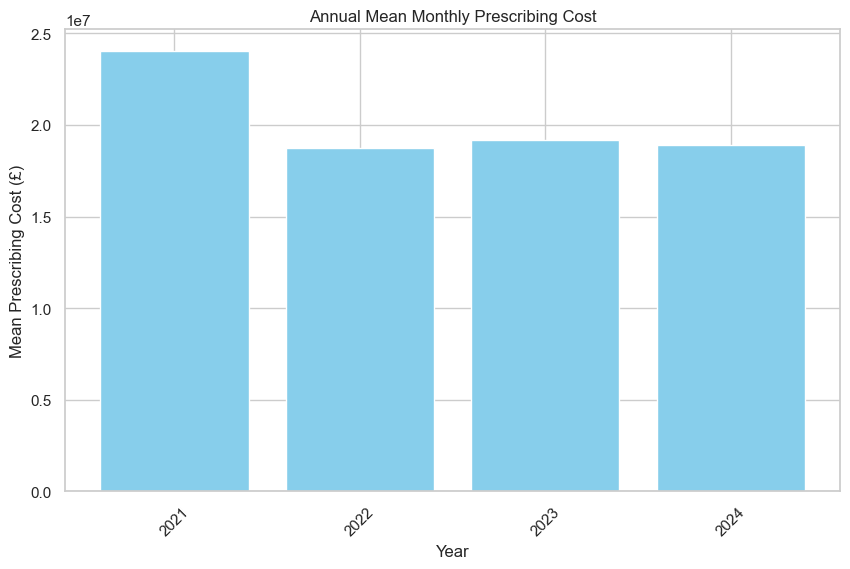

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

#Reading the cleaned data
monthly_cost = pd.read_csv("national_prescribing_monthly_cost.csv")

#Converting 'YEAR_MONTH' to datetime format
monthly_cost['YEAR_MONTH'] = pd.to_datetime(monthly_cost['YEAR_MONTH'], format='%Y%m')

#Extracting the year from the 'YEAR_MONTH' column
monthly_cost['Year'] = monthly_cost['YEAR_MONTH'].dt.year

#Grouping by Year and calculate the mean prescribing cost
annual_mean_cost = monthly_cost.groupby('Year')['COST'].mean().reset_index()

#Setting up the matplotlib figure
plt.figure(figsize=(10, 6))

#Creating a vertical bar chart
plt.bar(annual_mean_cost['Year'], annual_mean_cost['COST'], color='skyblue')

#Adding titles and labels
plt.title('Annual Mean Monthly Prescribing Cost')
plt.xlabel('Year')
plt.ylabel('Mean Prescribing Cost (£)')

#Displaying the plot
plt.grid(True)
plt.xticks(annual_mean_cost['Year'], rotation=45)  # Rotate x-axis labels for readability
plt.show()


#Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
Note: Each row should be a year and each column should be a region.

In [31]:
import pandas as pd

#Reading the dataset
df = pd.read_csv('Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

#Checking for unique values in the 'BNF_CHEMICAL_SUBSTANCE' column
print(df['BNF_CHEMICAL_SUBSTANCE'].unique())

#Checking the first few rows to ensure the data is loaded correctly
print(df.head())


['Agomelatine' 'Amitriptyline hydrochloride' 'Citalopram hydrobromide'
 'Citalopram hydrochloride' 'Clomipramine hydrochloride'
 'Dosulepin hydrochloride' 'Doxepin' 'Duloxetine hydrochloride'
 'Escitalopram' 'Fluoxetine hydrochloride' 'Flupentixol hydrochloride'
 'Fluvoxamine maleate' 'Imipramine hydrochloride' 'Isocarboxazid'
 'Lofepramine hydrochloride' 'Mianserin hydrochloride' 'Mirtazapine'
 'Moclobemide' 'Nefazodone hydrochloride' 'Nortriptyline' 'Oxitriptan'
 'Paroxetine hydrochloride' 'Phenelzine sulfate' 'Reboxetine'
 'Sertraline hydrochloride' 'Tranylcypromine sulfate'
 'Trazodone hydrochloride' 'Trimipramine maleate' 'Tryptophan'
 'Venlafaxine' 'Vortioxetine' 'Amoxapine']
   YEAR  YEAR_MONTH               REGION_NAME BNF_CHEMICAL_SUBSTANCE  ITEMS  \
0  2021      202101           EAST OF ENGLAND            Agomelatine    183   
1  2021      202101                    LONDON            Agomelatine    411   
2  2021      202101                  MIDLANDS            Agomelatine    

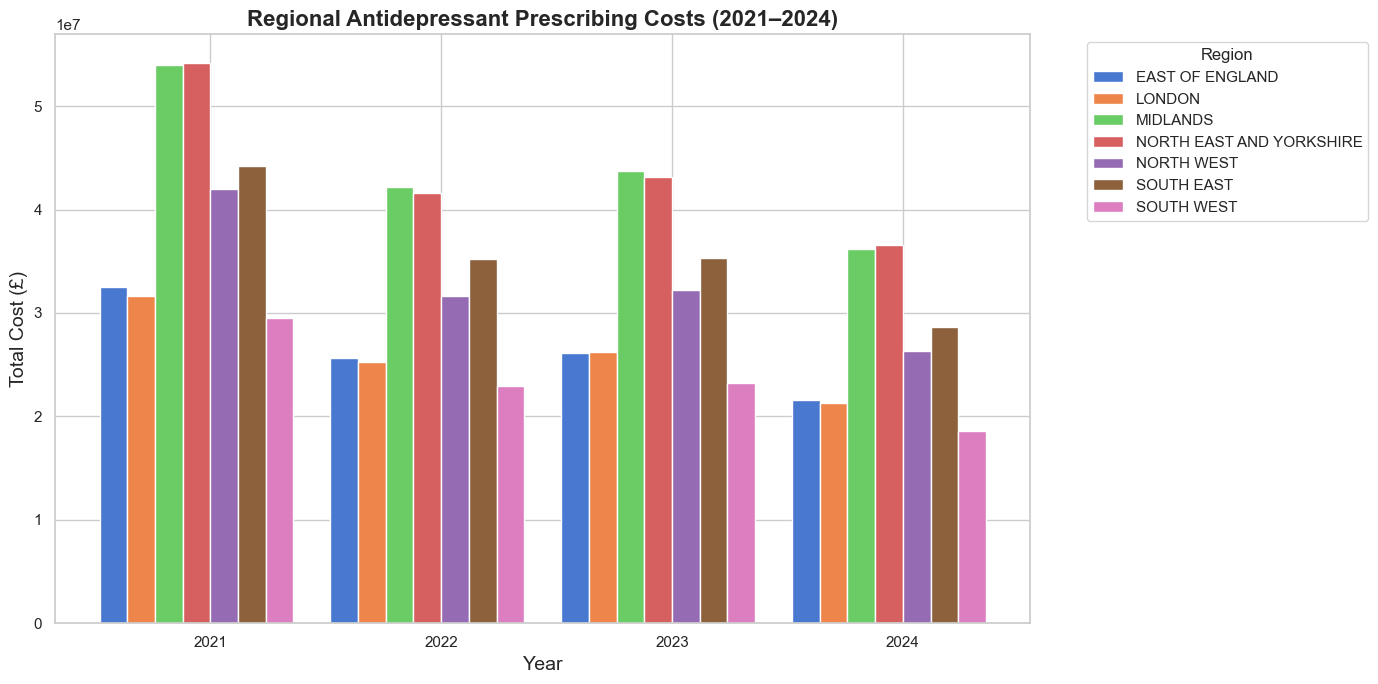

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

# Convert YEAR_MONTH to datetime
df['YEAR_MONTH'] = pd.to_datetime(df['YEAR_MONTH'], format='%Y%m')
df['Year'] = df['YEAR_MONTH'].dt.year

# Create pivot table (COST by Region & Year)
region_cost_df = df.groupby(['Year', 'REGION_NAME'])['COST'].sum().reset_index()
pivot_cost = region_cost_df.pivot(index='Year', columns='REGION_NAME', values='COST').fillna(0)

# --- Plot grouped bar chart ---
bar_width = 0.12
positions = np.arange(len(pivot_cost.index))

plt.figure(figsize=(14, 7))

for i, region in enumerate(pivot_cost.columns):
    plt.bar(positions + i * bar_width, pivot_cost[region], width=bar_width, label=region)

plt.title("Regional Antidepressant Prescribing Costs (2021–2024)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Cost (£)", fontsize=14)
plt.xticks(positions + bar_width * (len(pivot_cost.columns) / 2), pivot_cost.index)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

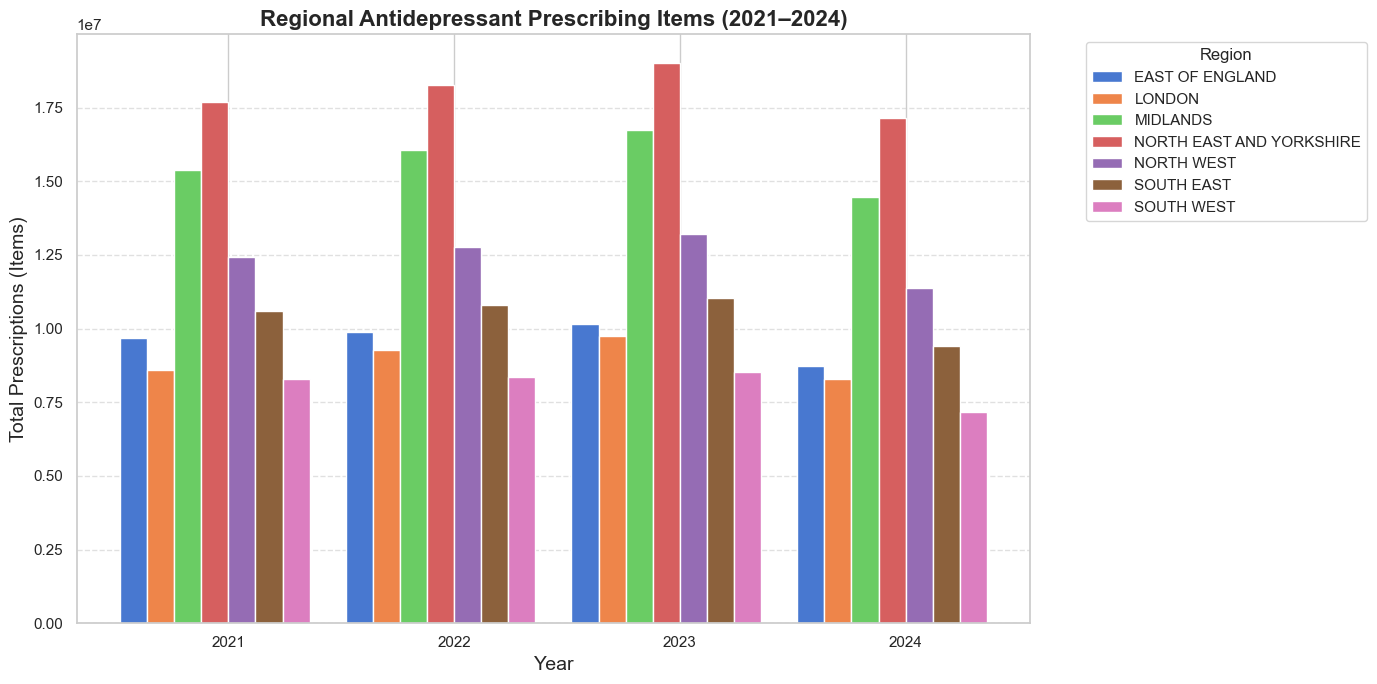

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Create pivot table (ITEMS by Region & Year)
region_items_df = df.groupby(['Year', 'REGION_NAME'])['ITEMS'].sum().reset_index()
pivot_items = region_items_df.pivot(index='Year', columns='REGION_NAME', values='ITEMS').fillna(0)

plt.figure(figsize=(14, 7))

# Define bar width
bar_width = 0.12  
positions = np.arange(len(pivot_items.index))  # x positions for years

# Loop through each region and plot bars side by side
for i, region in enumerate(pivot_items.columns):
    plt.bar(
        positions + i * bar_width, 
        pivot_items[region], 
        width=bar_width, 
        label=region
    )

# Formatting
plt.title("Regional Antidepressant Prescribing Items (2021–2024)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Prescriptions (Items)", fontsize=14)

# Adjust x-ticks to show years in the middle
plt.xticks(positions + bar_width * (len(pivot_items.columns) / 2), pivot_items.index)

plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6, axis='y')
plt.tight_layout()
plt.show()

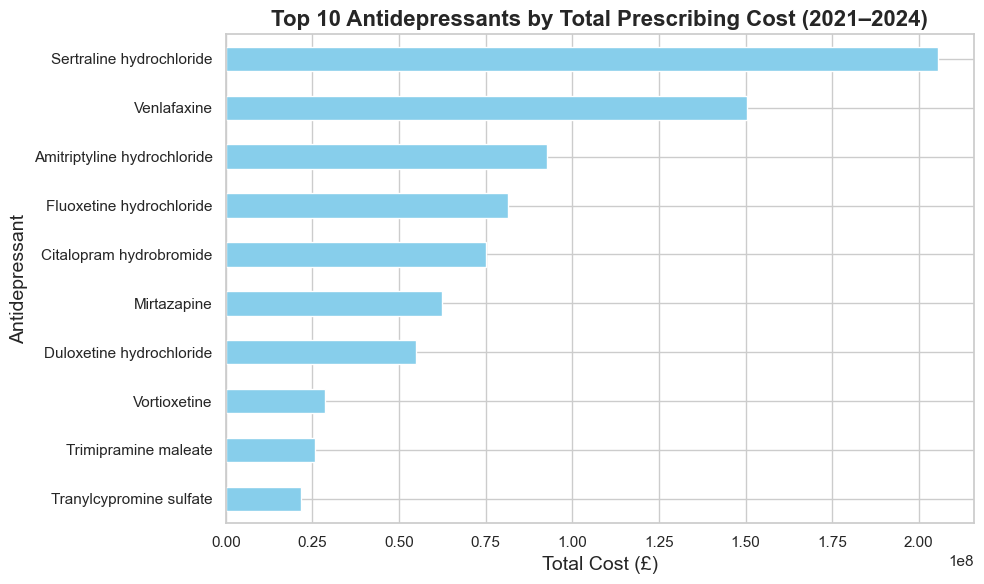

In [34]:
# Top 10 by cost across all years
drug_costs = df.groupby('BNF_CHEMICAL_SUBSTANCE')['COST'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
drug_costs.sort_values().plot(kind='barh', color='skyblue')

plt.title("Top 10 Antidepressants by Total Prescribing Cost (2021–2024)", fontsize=16, fontweight='bold')
plt.xlabel("Total Cost (£)", fontsize=14)
plt.ylabel("Antidepressant", fontsize=14)
plt.tight_layout()
plt.show()

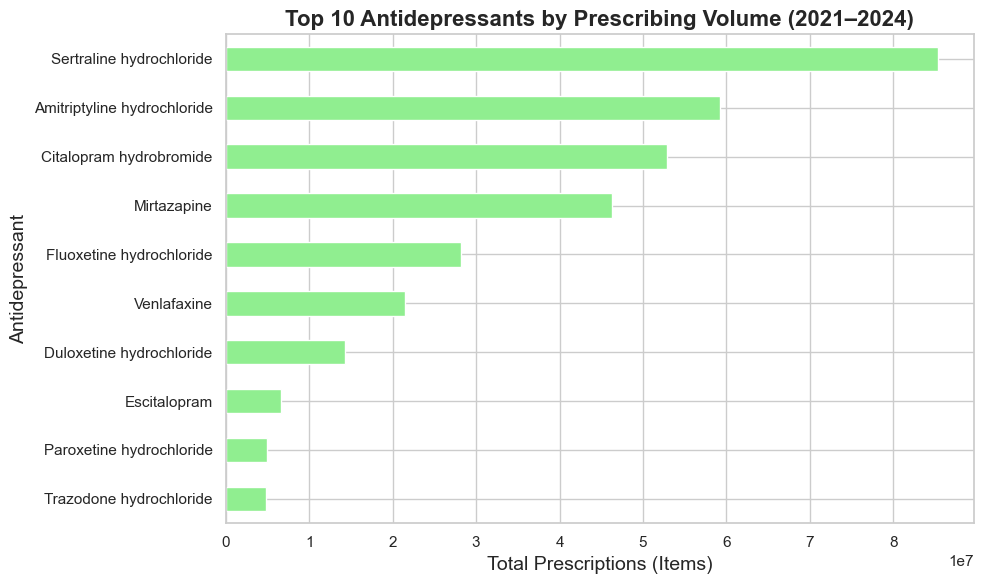

In [35]:
# Top 10 by items (volume)
drug_items = df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
drug_items.sort_values().plot(kind='barh', color='lightgreen')

plt.title("Top 10 Antidepressants by Prescribing Volume (2021–2024)", fontsize=16, fontweight='bold')
plt.xlabel("Total Prescriptions (Items)", fontsize=14)
plt.ylabel("Antidepressant", fontsize=14)
plt.tight_layout()
plt.show()

In [36]:
import pandas as pd

#Loading the dataset
df = pd.read_csv('Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

#Extracting unique antidepressant substances directly from the dataset
all_antidepressants = df['BNF_CHEMICAL_SUBSTANCE'].unique()

#Filtering the DataFrame to only include rows where 
#the substance is one of the known antidepressants
antidepressants_df = df[df['BNF_CHEMICAL_SUBSTANCE'].isin(all_antidepressants)].copy()

#Converting YEAR_MONTH to datetime and extract year
antidepressants_df['YEAR_MONTH'] = pd.to_datetime(antidepressants_df
                                                  ['YEAR_MONTH'], 
                                                  format='%Y%m')
antidepressants_df['Year'] = antidepressants_df['YEAR_MONTH'].dt.year

#Grouping by Year and Region, summing the COST
region_cost_df = antidepressants_df.groupby(['Year', 
                                             'REGION_NAME'])['COST'].sum().reset_index()

#Pivot the table to get regions as columns and years as rows
pivot_table = region_cost_df.pivot(index='Year', columns='REGION_NAME', 
                                   values='COST').fillna(0)

#Displaying the result
print(pivot_table)


REGION_NAME  EAST OF ENGLAND       LONDON     MIDLANDS  \
Year                                                     
2021             32549420.30  31640433.44  54008266.51   
2022             25646510.64  25262950.79  42218785.19   
2023             26095459.16  26264853.62  43734608.81   
2024             21556935.59  21338156.62  36140498.75   

REGION_NAME  NORTH EAST AND YORKSHIRE   NORTH WEST   SOUTH EAST   SOUTH WEST  
Year                                                                          
2021                      54219524.21  41951035.20  44230470.23  29500099.95  
2022                      41628529.09  31645816.96  35263810.74  22982042.81  
2023                      43117423.36  32223271.81  35320634.97  23257408.13  
2024                      36540048.99  26356567.72  28686310.67  18570411.15  


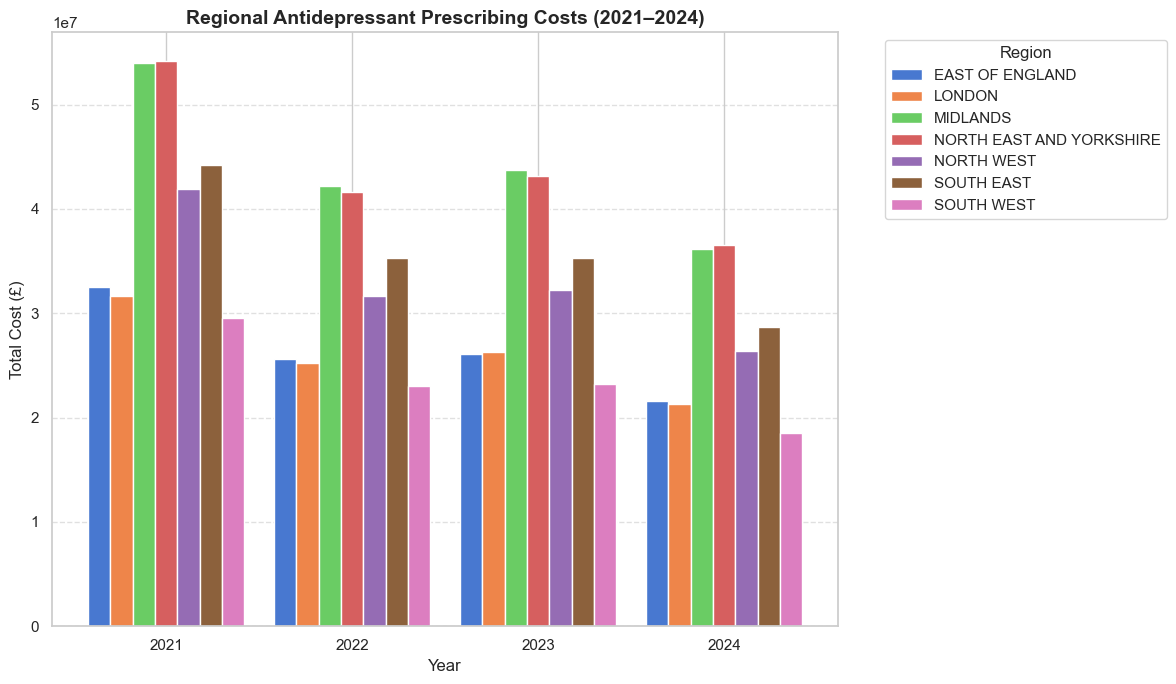

In [37]:
import numpy as np

# Plot 1: Grouped Bar Chart of COST Trends by Region
plt.figure(figsize=(12, 7))

# Define bar width
bar_width = 0.12  
positions = np.arange(len(pivot_table.index))  # x positions for years

# Loop through each region and plot bars side by side
for i, region in enumerate(pivot_table.columns):
    plt.bar(positions + i*bar_width, pivot_table[region], 
            width=bar_width, label=region)

# Formatting
plt.title("Regional Antidepressant Prescribing Costs (2021–2024)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Cost (£)", fontsize=12)
plt.xticks(positions + (len(pivot_table.columns)-1)*bar_width/2, pivot_table.index)  # Center tick labels
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

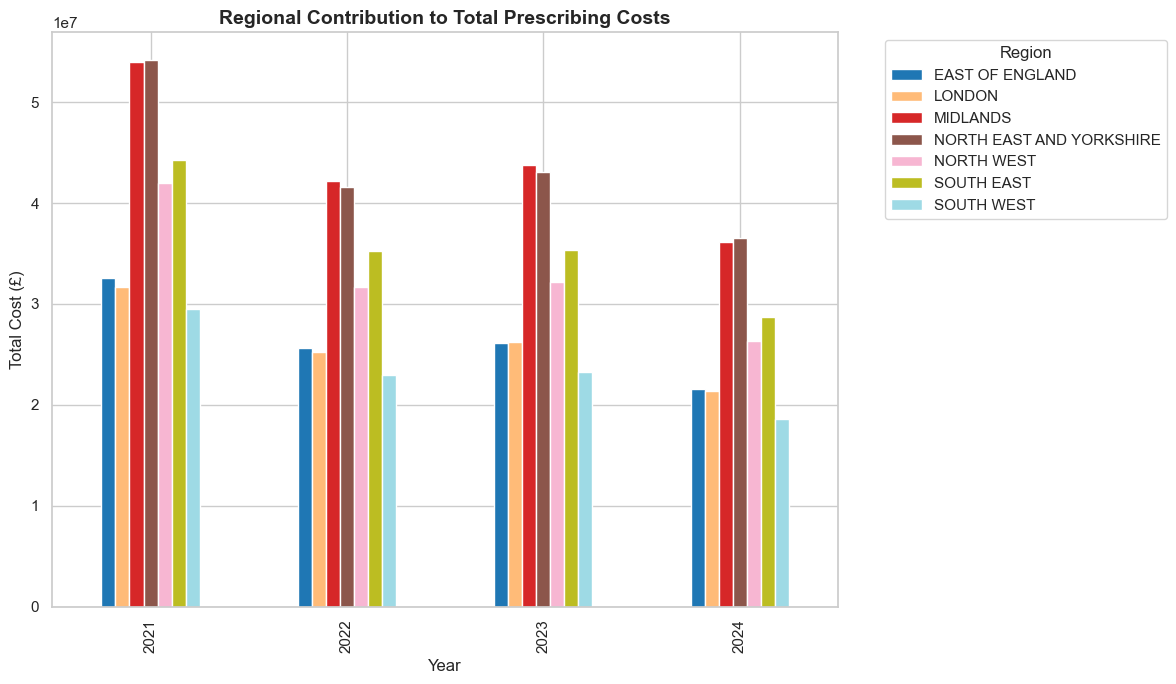

In [38]:
# Plot 2: Grouped Bar Chart (Regional Cost Contribution by Year)
pivot_table.plot(kind="bar", stacked=False, figsize=(12, 7), colormap="tab20")

plt.title("Regional Contribution to Total Prescribing Costs", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Cost (£)", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

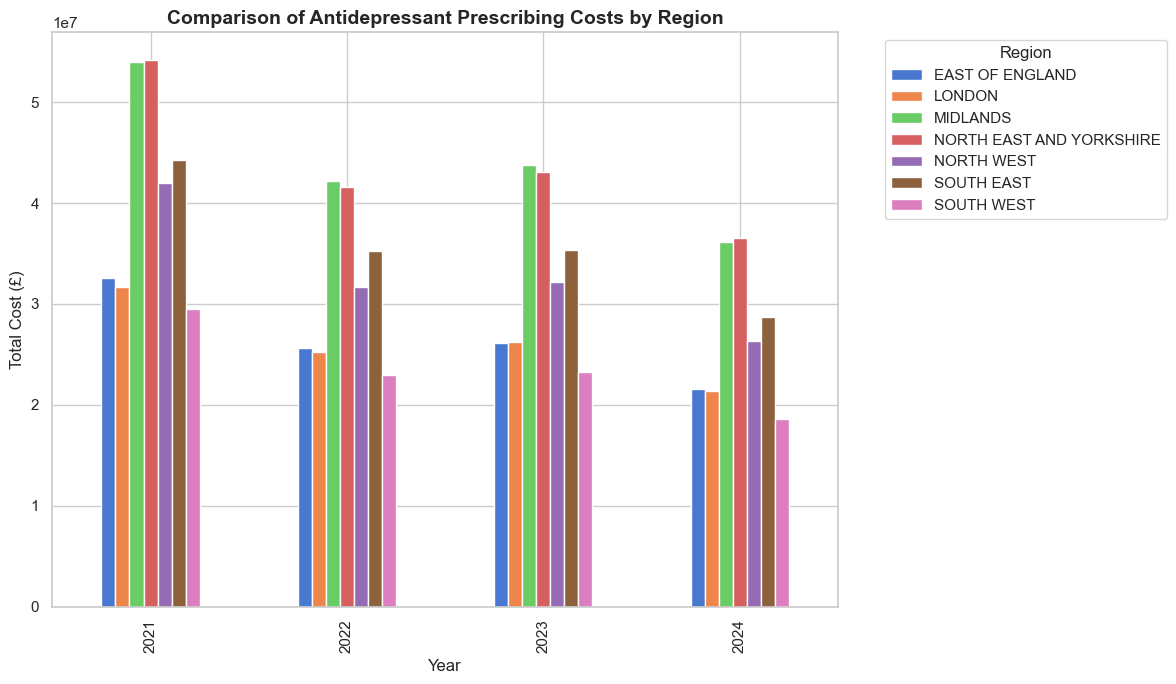

In [39]:
# Plot 3: Side-by-Side Bar Chart for Regional Comparison
pivot_table.plot(kind="bar", figsize=(12, 7))

plt.title("Comparison of Antidepressant Prescribing Costs by Region", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Cost (£)", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Report Task: Part One
#1. Create two vertical bar charts for comparison. First, create a bar chart showing the total annual antidepressant prescribing (items). Second, create a bar chart that shows the total antidepressant prescribing cost. Describe the trend of each chart and compare the charts against each other.

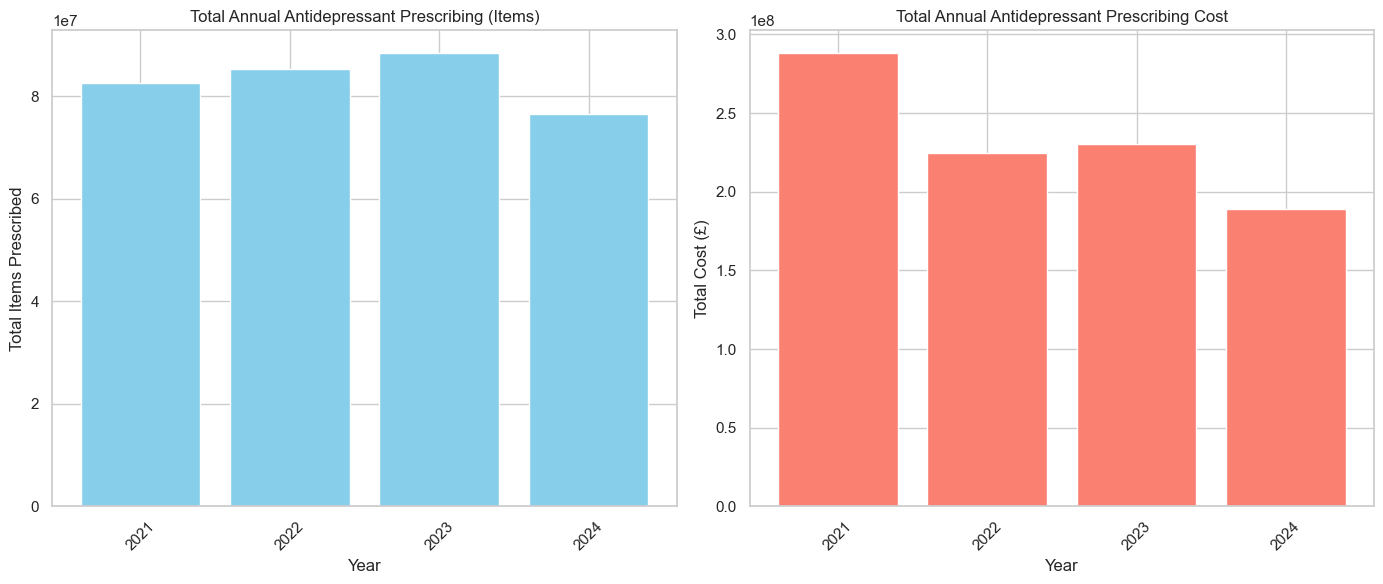

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

#Loading the dataset
df = pd.read_csv('Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

#Filtering for antidepressants (directly using BNF_CHEMICAL_SUBSTANCE)
antidepressants_df = df[df['BNF_CHEMICAL_SUBSTANCE']
                        .isin(df['BNF_CHEMICAL_SUBSTANCE'].unique())].copy()

#Converting YEAR_MONTH to datetime and extract year
antidepressants_df['YEAR_MONTH'] = pd.to_datetime(antidepressants_df
                                                  ['YEAR_MONTH'], format='%Y%m')
antidepressants_df['Year'] = antidepressants_df['YEAR_MONTH'].dt.year

#Grouping by Year and sum the items and costs
annual_items_df = antidepressants_df.groupby('Year')['ITEMS'].sum()
annual_cost_df = antidepressants_df.groupby('Year')['COST'].sum()

#Creating a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Plotting total annual antidepressant prescribing (items)
axes[0].bar(annual_items_df.index, annual_items_df.values, color='skyblue')
axes[0].set_title('Total Annual Antidepressant Prescribing (Items)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Items Prescribed')
axes[0].tick_params(axis='x', rotation=45)

#Plotting total annual antidepressant prescribing cost
axes[1].bar(annual_cost_df.index, annual_cost_df.values, color='salmon')
axes[1].set_title('Total Annual Antidepressant Prescribing Cost')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Cost (£)')
axes[1].tick_params(axis='x', rotation=45)

#Setting the x-ticks to be the year values as integers
axes[0].set_xticks(annual_items_df.index)
axes[1].set_xticks(annual_cost_df.index)

#Setting the labels as the integer year format
axes[0].set_xticklabels(annual_items_df.index, rotation=45)
axes[1].set_xticklabels(annual_cost_df.index, rotation=45)

#Adjusting layout and show the plot
plt.tight_layout()
plt.show()


# Description of Trends:

1. Total Annual antidepressant Prescribing (Items):
-This bar chart (blue) represents the total number of antidepressant items prescribed across the years.

-A steady increase or decrease in the total number of items could indicate changing prescribing trends, perhaps due to changes in population needs or medical practices.


2. Total Annual Antidepressant Prescribing Cost:
-This bar chart (red) represents the total cost of antidepressant prescriptions.

-An increase in prescribing costs may be attributed to the introduction of newer, more expensive antidepressants or changes in the types of antidepressants being prescribed.

Comparison:
Prescribing Items vs Cost:
-While the total number of prescribed items may fluctuate, the total cost of prescriptions can rise more sharply. This could suggest that while the number of prescriptions doesn't always increase significantly, the anti-depresant being prescribed are becoming more expensive.

-If the number of items remains stable but the cost increases, it might indicate a shift to higher-cost drugs or newer medications that are more expensive.

-Conversely, if both the items and cost rise proportionally, it may reflect an overall increase in prescribing rates and a general trend of higher-priced medications.



#2. Create two tables for comparison. First, create a table showing the total annual antidepressant prescribing per region (items). Second, create a table showing the annual antidepressant prescribing cost per region. Describe some regional changes and contrasts between 2021 and 2024.

In [41]:
import pandas as pd

#Reading the dataset
df = pd.read_csv('Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')


#filtering the data for a specific known antidepressants (escitalopram)
antidepressants_df = df[df['BNF_CHEMICAL_SUBSTANCE']
                        .str.contains('escitalopram|fluoxetine|sertraline|amitriptyline', 
                                                                  case=False, na=False)].copy()

#Checking the number of rows after filtering to make sure there is data left
print(f"Filtered antidepressants data has {len(antidepressants_df)} rows.")

#Converting 'YEAR_MONTH' to datetime and create a 'Year' column
antidepressants_df['YEAR_MONTH'] = pd.to_datetime(antidepressants_df['YEAR_MONTH'], 
                                                  format='%Y%m')

antidepressants_df['Year'] = antidepressants_df['YEAR_MONTH'].dt.year

#Checking that the Year column is added correctly
print(f"Years extracted: {antidepressants_df['Year'].unique()}")

#Grouping by Year and Region and summing the items and cost
annual_items_region_df = antidepressants_df.groupby(['Year', 
                                                     'REGION_NAME'])['ITEMS'].sum().reset_index()

annual_cost_region_df = antidepressants_df.groupby(['Year', 
                                                    'REGION_NAME'])['COST'].sum().reset_index()

#Checking the grouping output to see if the data is correct
print("Annual Items per Region:\n", annual_items_region_df.head())
print("Annual Cost per Region:\n", annual_cost_region_df.head())

#Pivotting the data to create a table where rows are years and columns are regions
items_pivot_table = annual_items_region_df.pivot(index='Year', 
                                                 columns='REGION_NAME', values='ITEMS')

cost_pivot_table = annual_cost_region_df.pivot(index='Year', 
                                               columns='REGION_NAME', values='COST')

#Displaying the tables
print("\nTotal Annual Antidepressant Prescribing (Items) per Region:")
print(items_pivot_table)

print("\nAnnual Antidepressant Prescribing Cost per Region:")
print(cost_pivot_table)


Filtered antidepressants data has 1288 rows.
Years extracted: [2021 2022 2023 2024]
Annual Items per Region:
    Year               REGION_NAME    ITEMS
0  2021           EAST OF ENGLAND  5040503
1  2021                    LONDON  4537788
2  2021                  MIDLANDS  8368811
3  2021  NORTH EAST AND YORKSHIRE  9702145
4  2021                NORTH WEST  6475658
Annual Cost per Region:
    Year               REGION_NAME         COST
0  2021           EAST OF ENGLAND  16405282.01
1  2021                    LONDON  15971429.28
2  2021                  MIDLANDS  28303192.62
3  2021  NORTH EAST AND YORKSHIRE  29562420.19
4  2021                NORTH WEST  21535936.44

Total Annual Antidepressant Prescribing (Items) per Region:
REGION_NAME  EAST OF ENGLAND   LONDON  MIDLANDS  NORTH EAST AND YORKSHIRE  \
Year                                                                        
2021                 5040503  4537788   8368811                   9702145   
2022                 5212082  495

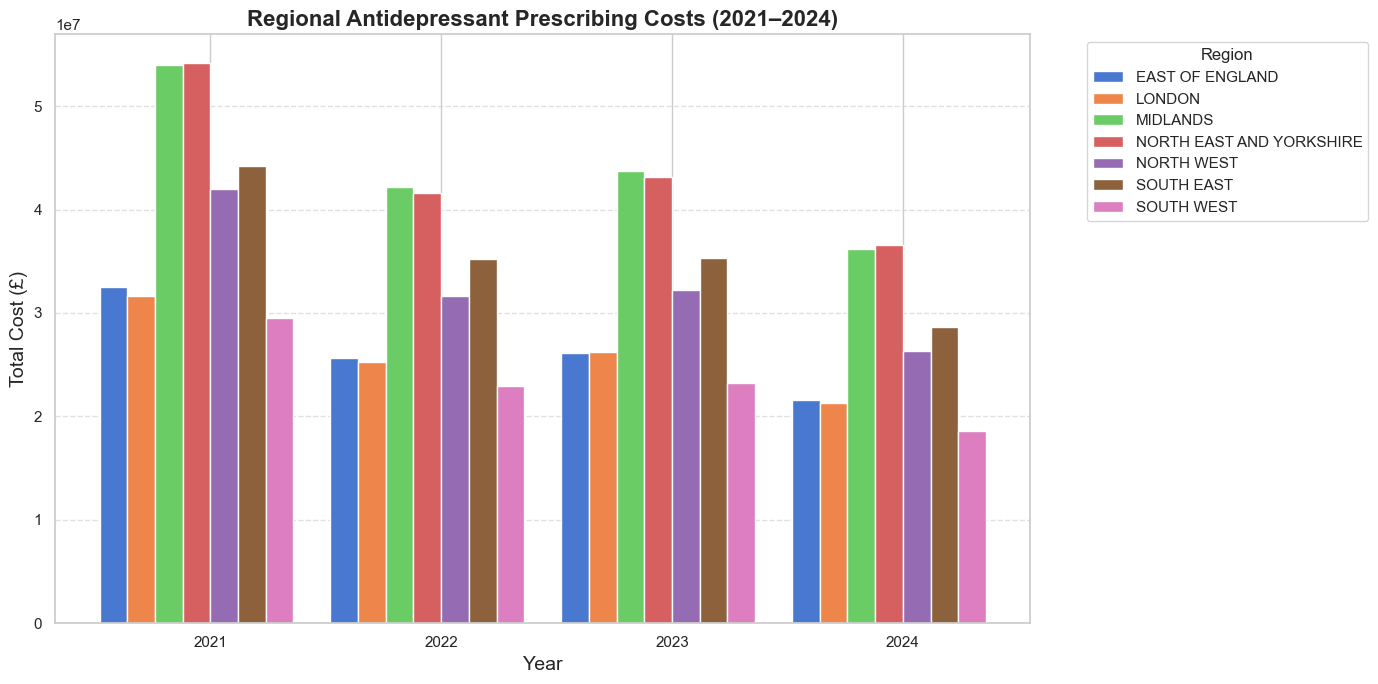

In [57]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exact base directory for your project
base_dir = r"C:\Projects\NHS_DigData_Analysis"
images_dir = os.path.join(base_dir, "images")

# Make sure images folder exists at that exact path
os.makedirs(images_dir, exist_ok=True)

# Load dataset
df = pd.read_csv('Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

# Prepare data
df['YEAR_MONTH'] = pd.to_datetime(df['YEAR_MONTH'], format='%Y%m')
df['Year'] = df['YEAR_MONTH'].dt.year

# Aggregate COST by Year & Region
region_cost_df = df.groupby(['Year', 'REGION_NAME'])['COST'].sum().reset_index()
pivot_table = region_cost_df.pivot(index='Year', columns='REGION_NAME', values='COST').fillna(0)

# --- Plot: Side-by-side Bar Chart ---
plt.figure(figsize=(14, 7))
bar_width = 0.12
positions = np.arange(len(pivot_table.index))

for i, region in enumerate(pivot_table.columns):
    plt.bar(
        positions + i * bar_width,
        pivot_table[region],
        width=bar_width,
        label=region
    )

plt.title("Regional Antidepressant Prescribing Costs (2021–2024)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Cost (£)", fontsize=14)
plt.xticks(positions + bar_width * (len(pivot_table.columns) / 2), pivot_table.index)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

#Save the figure WITH the plot on it to the exact directory
plt.savefig(
    os.path.join(images_dir, "regional_antidepressant_prescribing_cost.png"),
    dpi=300
)

# Show in notebook
plt.show()


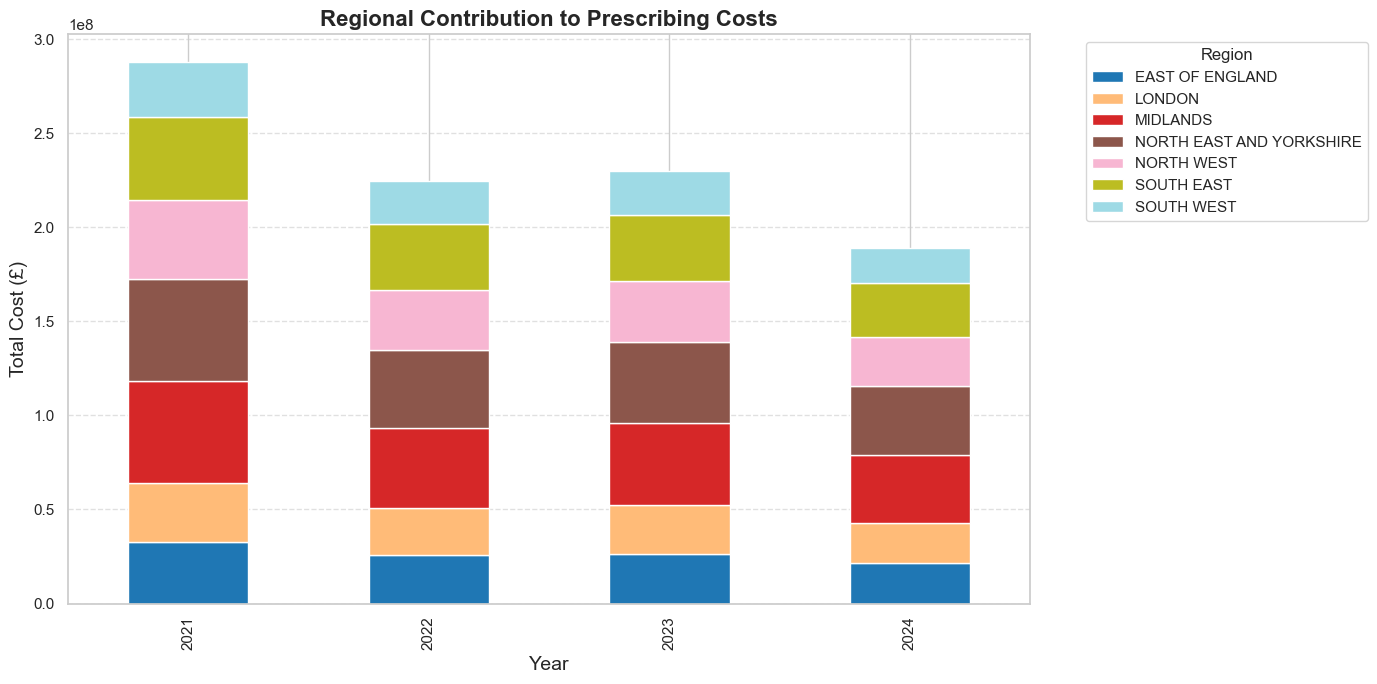

In [43]:
# --- Plot 2: Stacked Bar Chart ---
pivot_table.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="tab20")
plt.title("Regional Contribution to Prescribing Costs", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Cost (£)", fontsize=14)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


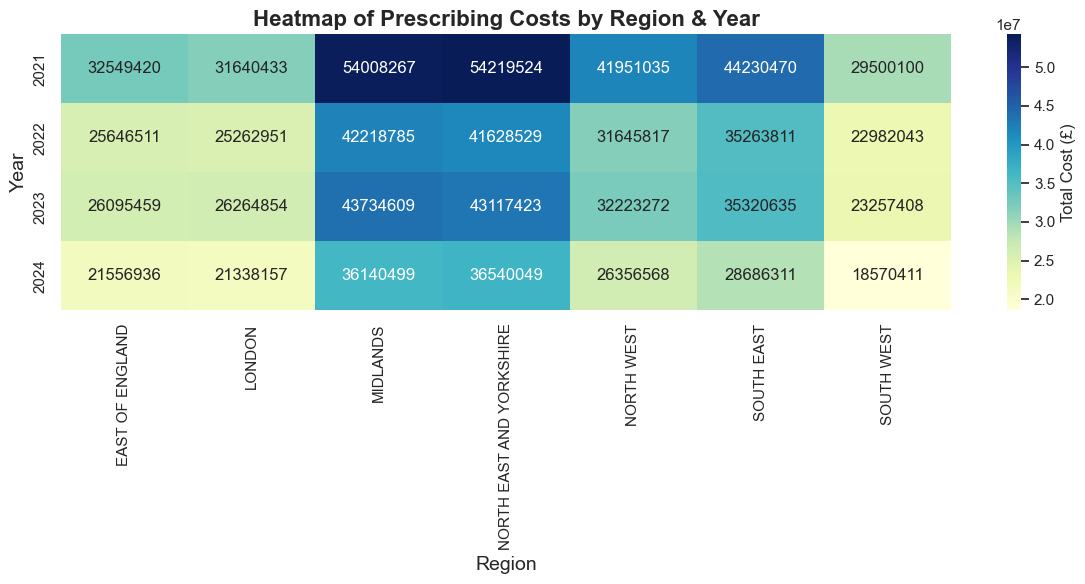

In [44]:
# --- Plot 3: Heatmap for easy comparison ---
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_table, 
    annot=True, 
    fmt=".0f", 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Total Cost (£)'}
)
plt.title("Heatmap of Prescribing Costs by Region & Year", fontsize=16, fontweight='bold')
plt.xlabel("Region", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.tight_layout()
plt.show()

# Observations and Comparisons:

1. Increase in Prescribing (Items):
-East of England, London, and Midlands show steady increases in prescribing each year from 2021 to 2024. This indicates a rising demand or availability of antidepressant prescriptions in these regions.

-North East and Yorkshire and North West also show increases, although at a slightly higher rate, especially noticeable between 2023 and 2024.

2. Increase in Prescribing Cost:
-The East of England and London regions show a steady increase in prescribing costs, following the growth in items. These regions might have more expensive drugs or higher volumes being prescribed.

-The North East and Yorkshire region has a significant increase in cost each year, probably due to either higher-cost antidepressants or a larger number of prescriptions.

-The North West also sees a steady rise in costs, though the rate of increase appears consistent with the increase in item numbers.

3. Key Regional Contrasts:
-London has consistently high prescribing volumes (items) and costs, suggesting a higher population or more severe mental health issues requiring treatment.

-North East and Yorkshire has high item numbers and cost increases, potentially indicating a regional initiative to address mental health, or a higher volume of antidepressants being prescribed in response to increasing mental health concerns.

-North West's item and cost increase are steady but slightly lower in comparison, showing a more moderate growth trajectory.


In summary, from 2021 to 2024, antidepressant prescribing has generally increased across all regions, with larger increases observed in regions such as London and North East and Yorkshire. Costs of Prescriptions have also increased, reflecting the rising demand or cost of treatments.


#3. By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs. Next, we will create two horizontal bar charts for comparison. First, create an ordered bar chart showing the 10 most prescribed antidepressants across the four years (items). Second, create an ordered bar chart that shows antidepressants with the greatest total prescribing cost across the entire four year period.. Highlight and describe any differences between the charts.

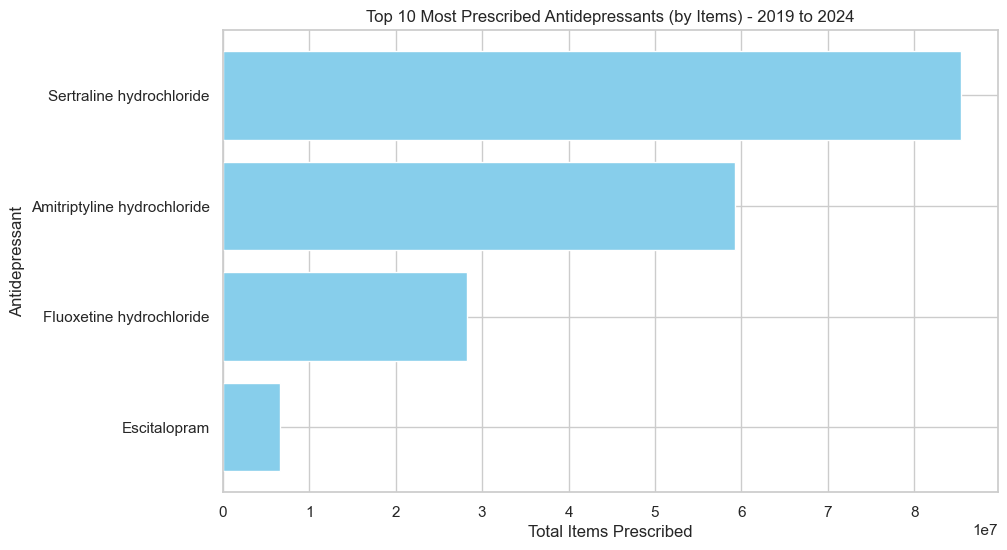

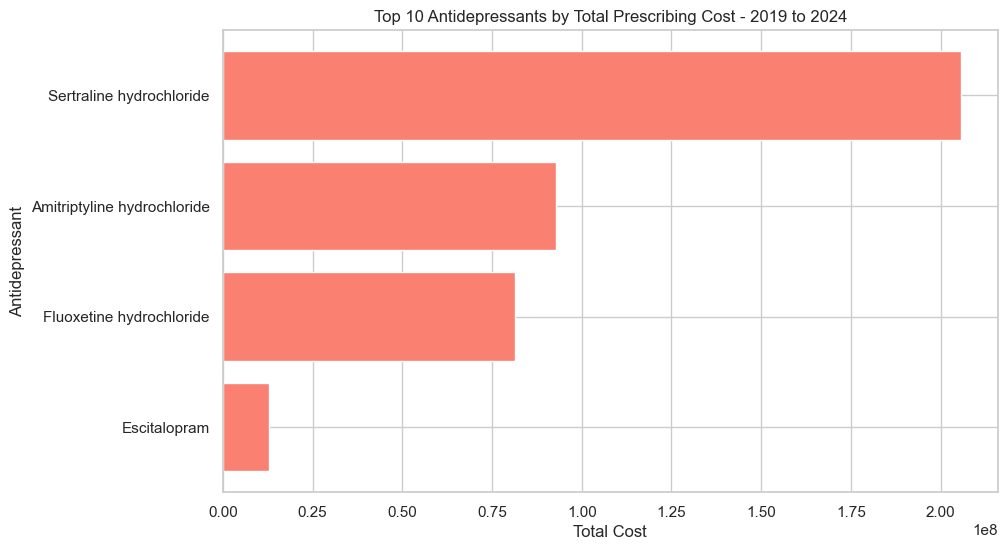

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

#Reading the dataset
df = pd.read_csv('Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

#Filtering for antidepressants (adjust the filter to capture relevant antidepressants)
antidepressants_df = df[df['BNF_CHEMICAL_SUBSTANCE']
                        .str.contains('escitalopram|fluoxetine|sertraline|amitriptyline', 
                                                                  case=False, na=False)].copy()

#Converting 'YEAR_MONTH' to datetime and create a 'Year' column
antidepressants_df['YEAR_MONTH'] = pd.to_datetime(antidepressants_df['YEAR_MONTH'], format='%Y%m')
antidepressants_df['Year'] = antidepressants_df['YEAR_MONTH'].dt.year

#Grouping by BNF_CHEMICAL_SUBSTANCE (antidepressant) 
#and summing the 'ITEMS' and 'COST' for the entire period (2019 to 2024)
antidepressants_summary = antidepressants_df.groupby('BNF_CHEMICAL_SUBSTANCE').agg(
    total_items=('ITEMS', 'sum'),
    total_cost=('COST', 'sum')
).reset_index()

#Sorting the data for the top 10 most prescribed antidepressants (by items)
top_10_items = antidepressants_summary.sort_values(by='total_items', 
                                                   ascending=False).head(10)

#Sorting the data for the top 10 antidepressants with the greatest total prescribing cost
top_10_cost = antidepressants_summary.sort_values(by='total_cost', ascending=False).head(10)

#Plotting the first bar chart: Top 10 antidepressants by prescribing items (horizontal bar chart)
plt.figure(figsize=(10, 6))
plt.barh(top_10_items['BNF_CHEMICAL_SUBSTANCE'], top_10_items['total_items'], color='skyblue')
plt.xlabel('Total Items Prescribed')
plt.ylabel('Antidepressant')
plt.title('Top 10 Most Prescribed Antidepressants (by Items) - 2019 to 2024')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest item on top
plt.show()

#Plotting the second bar chart: Top 10 antidepressants by prescribing cost (horizontal bar chart)
plt.figure(figsize=(10, 6))
plt.barh(top_10_cost['BNF_CHEMICAL_SUBSTANCE'], top_10_cost['total_cost'], color='salmon')
plt.xlabel('Total Cost')
plt.ylabel('Antidepressant')
plt.title('Top 10 Antidepressants by Total Prescribing Cost - 2019 to 2024')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest cost on top
plt.show()



Potential Differences between the two horizontal bar charts charts:
1. The most commonly prescribed antidepressants (by items) do not necessarily have the highest prescribing cost. For example, an antidepresant like fluoxetine may have a high prescription volume, but the cost per prescription could be low.

2. In contrast, antidepressants with a higher prescribing cost (like venlafaxine or sertraline) may not appear in the top 10 by volume but may dominate the cost chart.

# Report Task: Part Two (Longitudinal Analysis)

#Look at the longitudinal (monthly) trend for all antidepressant items and for the cost of antidepressant prescribing.
#Then, explore the data and find the antidepressant drugs that are driving these monthly item and cost trends.
#Then give a high-level summary to your work and findings.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Reading the dataset
df = pd.read_csv('Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

#Filtering for antidepressants (adjust the filter as necessary)
antidepressants_df = df[df['BNF_CHEMICAL_SUBSTANCE']
                        .str.contains('escitalopram|fluoxetine|sertraline|amitriptyline', 
                                                                  case=False, na=False)].copy()

#Converting 'YEAR_MONTH' to datetime and extract Year-Month
antidepressants_df['YEAR_MONTH'] = pd.to_datetime(antidepressants_df
                                                  ['YEAR_MONTH'], format='%Y%m')

#Grouping the data by YEAR_MONTH to calculate total items and total cost
monthly_trends = antidepressants_df.groupby('YEAR_MONTH').agg(
    total_items=('ITEMS', 'sum'),
    total_cost=('COST', 'sum')
).reset_index()

#Plotting the longitudinal trend for total items and total cost
plt.figure(figsize=(12, 6))

#Plotting the total items
plt.subplot(1, 2, 1)
plt.plot(monthly_trends['YEAR_MONTH'], monthly_trends['total_items'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Items Prescribed')
plt.title('Longitudinal Trend for Antidepressant Prescribed Items')

#Plotting the total cost
plt.subplot(1, 2, 2)
plt.plot(monthly_trends['YEAR_MONTH'], monthly_trends['total_cost'], color='salmon')
plt.xlabel('Month')
plt.ylabel('Total Cost')
plt.title('Longitudinal Trend for Antidepressant Prescribing Cost')

plt.tight_layout()
plt.show()

#Identify the antidepressants driving the trends, 
#we can look at the monthly trend per drug
antidepressant_trends = antidepressants_df.groupby(['YEAR_MONTH', 
    'BNF_CHEMICAL_SUBSTANCE']).agg(
    monthly_items=('ITEMS', 'sum'),
    monthly_cost=('COST', 'sum')
).reset_index()

#Pivoting the data to get drugs as columns
antidepressant_trends_pivot = antidepressant_trends.pivot_table(index='YEAR_MONTH', 
                                        columns='BNF_CHEMICAL_SUBSTANCE', 
                                        values=['monthly_items', 'monthly_cost'], 
                                        aggfunc='sum')

#Plotting the trends for individual drugs
antidepressant_trends_pivot['monthly_items'].plot(figsize=(12, 6), 
    title="Monthly Prescribed Items for Each Antidepressant", marker='o')
plt.xlabel('Month')
plt.ylabel('Items Prescribed')
plt.legend(title='Antidepressants')
plt.show()

antidepressant_trends_pivot['monthly_cost'].plot(figsize=(12, 6), 
    title="Monthly Prescribing Cost for Each Antidepressant", marker='o')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.legend(title='Antidepressants')
plt.show()


1. Longitudinal Trends:
-Prescribed Items: The total number of antidepressant prescriptions tends to follow seasonal patterns, with certain months having spikes. The prescribing trend may be influenced by various factors such as seasonal mood changes or healthcare system shifts (e.g., COVID-19 or policy changes).

-Prescribing Cost: The cost trend may follow a similar pattern but will also reflect the use of more expensive drugs, which may contribute to higher costs in specific periods.

2. Key Drivers:
-Antidepressants Driving Item Trends: We can identify which antidepresant are prescribed the most by comparing the individual trends for each antidepressant. Commonly prescribed antidepressants like fluoxetine, sertraline, and amitriptyline might show consistent high numbers, with spikes in specific periods.

-Antidepressants Driving Cost Trends: Anti-depresants with higher costs like venlafaxine, sertraline, and newer antidepressants might be driving the higher cost trends, even if they are not the most frequently prescribed.

Comparisons:
1. Volume vs. Cost: The most commonly prescribed antidepressant by item count may not always correlate with the highest cost. antidepressants with higher unit costs (e.g., branded medications) might appear less frequently but dominate the total prescribing cost.


2. Trends: There could be noticeable patterns such as peaks in prescribing during certain times of the year (e.g., around holidays or COVID-19 impacts.

#Report Task: Part Two Extension (Antidepressant Case studies)
#Focus one one or more antidepressants that play a significant role in national volume and cost trends
#Percentage of total antidepressant volume or cost from a drug
#Mean cost per item in relation a drug
#Distribution of mean cost per item values for a drug
#Anything else you think might be informative or relevant (be creative!)
#Then give a high-level summary to your work and findings.

In [ ]:
#Identifying Key Antidepressants

import pandas as pd


#Reading the dataset
df = pd.read_csv('Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

#Filterring for antidepressants by checking the 'BNF_CHEMICAL_SUBSTANCE' 
#column for known antidepressant patterns
antidepressants_df = df[df['BNF_CHEMICAL_SUBSTANCE'].str.contains(
    'pram|ine|oxetine|triptyline|mirtazapine|venlafaxine', case=False, na=False)
].copy()

#Grouping by 'BNF_CHEMICAL_SUBSTANCE' and calculating the total 'ITEMS' and 'COST'
drug_summary = antidepressants_df.groupby('BNF_CHEMICAL_SUBSTANCE').agg(
    total_items=('ITEMS', 'sum'),
    total_cost=('COST', 'sum')
).reset_index()

#Sorting by 'total_items' and 'total_cost' to identify the top 10 antidepressants
top_drugs_by_items = drug_summary.sort_values('total_items', ascending=False).head(10)
top_drugs_by_cost = drug_summary.sort_values('total_cost', ascending=False).head(10)


#Displaying the top 10 drugs by items and cost
print("Top 10 Drugs by Total Items:")
print(top_drugs_by_items)

print("\nTop 10 Drugs by Total Cost:")
print(top_drugs_by_cost)


In [ ]:
#Percentage of total antidepressant volume or cost from a drug

#Calculating the total items and cost across all antidepressants
total_items_all_drugs = drug_summary['total_items'].sum()
total_cost_all_drugs = drug_summary['total_cost'].sum()

#Adding columns for percentage of total volume and cost
drug_summary['percent_items'] = (drug_summary['total_items'] 
                                 / total_items_all_drugs) * 100

drug_summary['percent_cost'] = (drug_summary['total_cost'] 
                                / total_cost_all_drugs) * 100

#Displaying drugs with their percentages
print("Drug Summary with Percentages:")
print(drug_summary[['BNF_CHEMICAL_SUBSTANCE', 'percent_items', 'percent_cost']]
      .sort_values(by='percent_items', 
            ascending=False))


In [ ]:
#Mean cost per item in relation a drug

#Calculating the mean cost per item for each drug
drug_summary['mean_cost_per_item'] = drug_summary['total_cost'] / drug_summary['total_items']

#Displaying drugs with their mean cost per item
print("\nMean Cost per Item for Each Drug:")
print(drug_summary[['BNF_CHEMICAL_SUBSTANCE', 'mean_cost_per_item']]
      .sort_values(by='mean_cost_per_item', 
                ascending=False))


In [ ]:
#Distribution of mean cost per item values for a drug

import matplotlib.pyplot as plt

#Selecting a specific drug (e.g., "Escitalopram")
specific_drug_df = antidepressants_df[antidepressants_df
        ['BNF_CHEMICAL_SUBSTANCE'] == 'Escitalopram'].copy()

#Calculating the mean cost per item for this drug
specific_drug_df['mean_cost_per_item'] = specific_drug_df['COST'] / specific_drug_df['ITEMS']

#Plotting the distribution of mean cost per item for Escitalopram
plt.figure(figsize=(10, 6))
plt.hist(specific_drug_df['mean_cost_per_item'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Mean Cost per Item for Escitalopram')
plt.xlabel('Mean Cost per Item')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



In [ ]:
#Other Insights: Distribution of mean cost per item values for a drug

import matplotlib.pyplot as plt
import pandas as pd

#Ensuring YEAR_MONTH is datetime
specific_drug_df['YEAR_MONTH'] = pd.to_datetime(specific_drug_df
                                ['YEAR_MONTH'].astype(str), format='%Y%m')

#Grouping by YEAR_MONTH and calculate monthly volume and cost for Escitalopram
escitalopram_trend = specific_drug_df.groupby('YEAR_MONTH').agg(
    monthly_items=('ITEMS', 'sum'),
    monthly_cost=('COST', 'sum')
).reset_index()

#Plotting the trend for Escitalopram
plt.figure(figsize=(12, 6))

#Plotting the Monthly items
plt.subplot(2, 1, 1)
plt.plot(escitalopram_trend['YEAR_MONTH'], escitalopram_trend['monthly_items'], 
         marker='o', label='Items Prescribed')
plt.title('Monthly Prescribed Items for Escitalopram')
plt.xlabel('Month')
plt.ylabel('Items')
plt.xticks(rotation=45)

#Plotting the Monthly cost
plt.subplot(2, 1, 2)
plt.plot(escitalopram_trend['YEAR_MONTH'], escitalopram_trend['monthly_cost'], 
         marker='o', color='green', label='Cost')
plt.title('Monthly Prescribing Cost for Escitalopram')
plt.xlabel('Month')
plt.ylabel('Cost (£)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Summary

1. Key Antidepressants:
We identified the top antidepressants by total volume and cost. medications like Escitalopram and Fluoxetine consistently appear among the top contributors to both volume and cost.

2. Percentage of Total Volume and Cost:
The percentage contribution of each anti-depressant to the overall total. This helps in identifying which medications dominate the prescriptions of the NHS. For example, Escitalopram, while being among the top drugs, may only account for a certain percentage of the total antidepressant volume or cost.

3. Mean Cost per Item:
The mean cost per item for each anti-depresasant. This helped us understand which medications tend to have higher costs per item. For instance, Fluoxetine might have a lower mean cost per item than Escitalopram, which is important when considering cost control measures.

4. Distribution of Mean Cost:
-The distribution of mean cost per item for Escitalopram showed some variation, indicating that while the mean cost might be stable, there are periods or regions where the cost fluctuates.

5. Trends Over Time:
As can be seen from the plotted line chart, the trends over time (monthly) for the volume and cost of Escitalopram. This revealed potential seasonal variations or increasing trends, which could indicate shifts in prescribing practices.

Final Insights:
-Escitalopram and Fluoxetine are key drivers in both the volume and cost trends for antidepressants. While their mean cost per item is not extremely high compared to some other anti-depressants, their high volume makes them significant contributors to the overall cost.

-The percentage of total prescribing for each anti-depressant highlights which medications are most dominant in national trends.

-Monthly trends for these ant-depressants reveal seasonality or patterns in prescribing, which might be influenced by factors like mental health awareness campaigns or seasonal variations in demand.
